## Acessando os dados do Banco Central do Brasil 

- Importando Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

- Obtendo Dados através da API do Banco Central do Brasil

In [2]:
def consulta_bc(codigo_bcb):
    url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
    df = pd.read_json(url)
    df['data'] = pd.to_datetime(df['data'], dayfirst=True)
    df.set_index('data', inplace=True)
    return df

- Exemplos de consulta à API do BACEN

É possivel consultar o codigo de cada indicador macroeconomico no proprio site do Sistema de Gerenciamento do Banco Central.

https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries

IPCA

In [3]:
ipca = consulta_bc(433)

<AxesSubplot:xlabel='data'>

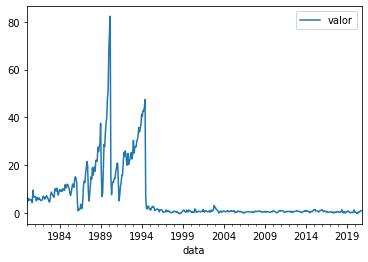

In [4]:
ipca.plot()

IGPM

In [5]:
igpm = consulta_bc(189)

<AxesSubplot:xlabel='data'>

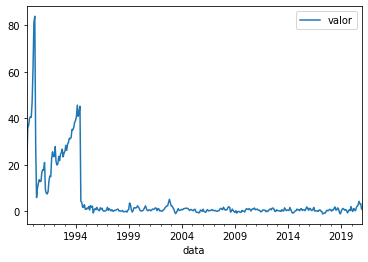

In [6]:
igpm.plot()

SELIC

In [7]:
selic = consulta_bc(432)

<AxesSubplot:xlabel='data'>

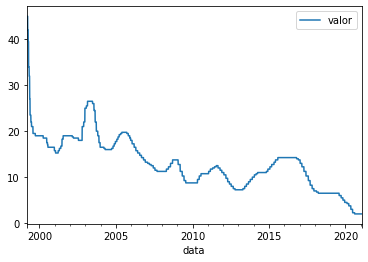

In [8]:
selic.plot()

Reservas Internacionais

In [9]:
reservas_internacionais = consulta_bc(13621)

<AxesSubplot:xlabel='data'>

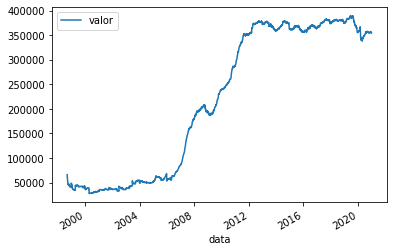

In [10]:
reservas_internacionais.plot()

PNAD

In [11]:
pnad = consulta_bc(24369)

<AxesSubplot:xlabel='data'>

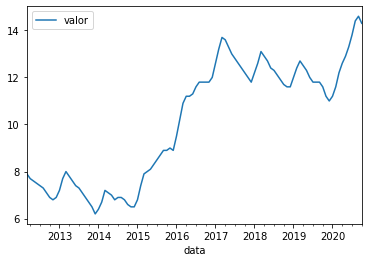

In [12]:
pnad.plot()

- CDI vs IBOV

In [13]:
ibov = yf.download(tickers='^BVSP')[['Adj Close']]

[*********************100%***********************]  1 of 1 completed


In [14]:
ibov_retorno = ibov.pct_change()

In [15]:
cdi = consulta_bc(12)

In [16]:
data_inicio = '2018-01-01'

Calculando o Retorno Acumulado o IBOV

In [17]:
ibov_retorno_acumulado = (1 + ibov_retorno[ibov_retorno.index >= data_inicio]).cumprod()
ibov_retorno_acumulado.iloc[0] = 1

Calculando a CDI acumulada

In [18]:
cdi_acumulado = (1 + cdi[cdi.index >= data_inicio] / 100).cumprod()
cdi_acumulado.iloc[0] = 1

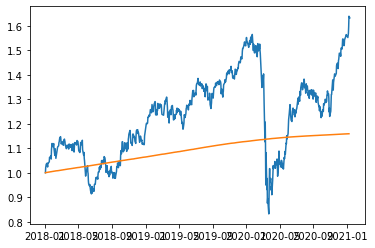

In [19]:
fig, ax = plt.subplots()
ax.plot(ibov_retorno_acumulado)
ax.plot(cdi_acumulado);